# Digit Recognizer (数字识别器)

使用著名的 MNIST 数据学习计算机视觉基础知识

![](./../img/Start.png)

**纯属感兴趣的选择 <(￣︶￣)↗[GO!]**

## 竞争描述

### MNIST

***MNIST***（ “修改后的国家标准与技术研究所” ）实际上是计算机视觉的 ***“你好”*** 数据集。

自 1999 年发布以来，这个经典的手写图像数据集一直作为基准分类算法的基础。

随着新的机器学习技术的出现，MNIST 仍然是研究人员和学习者的可靠资源。

### 目标

在这场比赛中，你的目标是从成千上万的手写图像数据集中 ***正确识别数字***。

我们 ***鼓励您尝试不同的算法***，以第一手了解哪些算法运行良好，以及如何比较技术。

## 数据集描述

数据文件 `train.csv` 和 `test.csv` 包含手绘数字的灰度图像，从 `0` 到 `9` 。

### 图像

每张图像高 `28` 像素，宽 `28` 像素， ***总共 `784` 像素*** 。

每个像素都有一个单独地像素值，表示该像素的亮度或暗度， ***数字越高表示越暗*** 。

该像素值是一个 ***介于 `0` 到 `255` 之间的整数***。

### 数据集

训练数据集（`train.csv`）有 `785` 列。

第一列称为 `“label”` ，是用户 ***绘制的数字*** 。

其余的列包含关联图像的像素值。

### 特征值

训练集中的每个像素列都有一个类似 `pixelx` 的名称，其中 `x` 是 `0` 到 `783` 之间的整数，包括 `0` 到 `783` 。

为了在图像上定位这个像素，假设我们将 `x` 分解为 `x = i * 28 + j` ，其中 `i` 和 `j` 是介于 `0` 到 `27` 之间的整数。

然后 `pixelx` 位于 `28 x 28` 矩阵的第 `i` 行和第 `j` 列，（索引为 `0`）。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 一、数据预处理

### 数据导入

In [2]:
train_data = pd.read_csv('./../data/train.csv')
test_data = pd.read_csv('./../data/test.csv')

In [3]:
X = train_data.iloc[:, 1:]
y = train_data['label']

### 数据展示

In [4]:
pixel_datas = np.array(X).reshape(-1, 28, 28)
pixel_datas.shape

(42000, 28, 28)

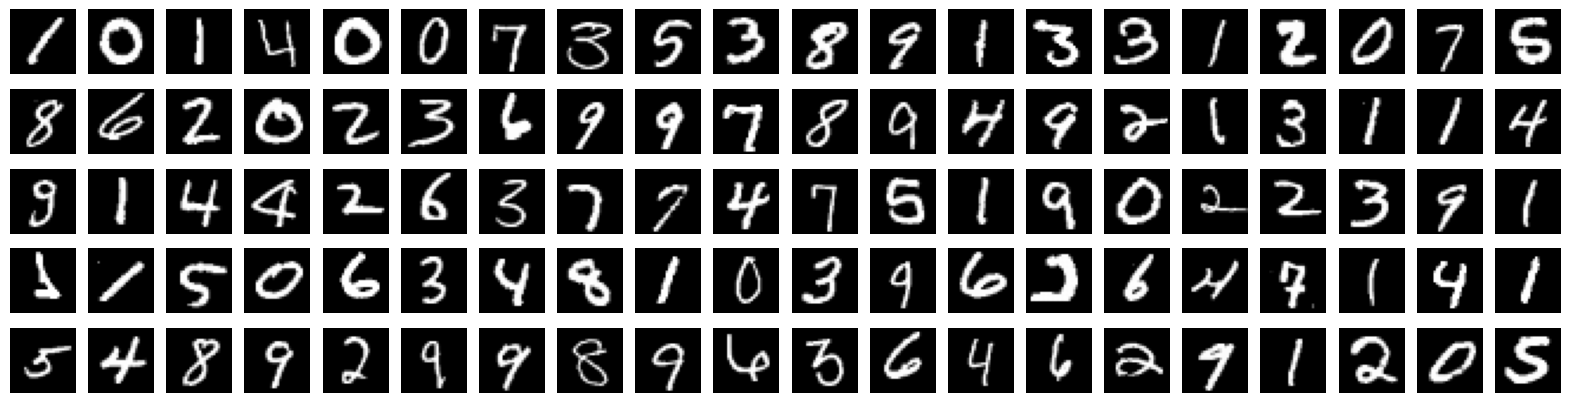

In [5]:
plt.figure(figsize=(20, 5))
for i, pixel_data in enumerate(pixel_datas[:100]):
    plt.subplot(5, 20, i + 1)
    plt.imshow(pixel_data, cmap='gray')
    plt.axis('off')
plt.show()

### 数据切分

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42)
X_train.shape

(31500, 784)

## 二、模型训练与评估

1. 逻辑回归 --> LogisticRegression
2. 支持向量机 --> SVC
3. 随机森林 (Bagging) --> RandomForestClassifier
4. LightGBM (Boosting) --> LGBMClassifier
5. 投票 (Voting) --> VotingClassifier
6. 堆叠 (Stacking) --> StackingClassifier

（神经网络还未学习）

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [24]:
pca = Pipeline([
    ('scaler', StandardScaler()), 
    ('pca', PCA(n_components='mle', svd_solver='full')), 
])
pca.fit(X_train)
pca['pca'].n_components_

np.int64(695)

***保留主要特征数 695***

### 1、逻辑回归

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

max_iter = 100 时未收敛，区间 200 -- 1000 效果相同，选取 200 。

使用 solver = 'saga' 时运行时间过长。

经过多次 AUC 测试，最终确定 C 最好地取值范围为：

C = 0.004 -- 0.012

进行更加精细的参数选取：

In [25]:
for c in range(3, 21):
    log_reg = Pipeline([
        ('scaler', StandardScaler()), 
        ('pca', PCA(n_components=695, random_state=42)), 
        ('log', LogisticRegression(max_iter=200, C=c/1000, n_jobs=-1)), 
    ])
    log_reg.fit(X_train, y_train)
    score = log_reg.score(X_val, y_val)
    y_proba = log_reg.predict_proba(X_val)
    auc = roc_auc_score(y_val, y_proba, multi_class='ovr')
    print(f"C: {c / 1000}, Accuracy: {score}, AUC: {auc:.4f}")

C: 0.003, Accuracy: 0.9187619047619048, AUC: 0.9933
C: 0.004, Accuracy: 0.9199047619047619, AUC: 0.9934
C: 0.005, Accuracy: 0.9203809523809524, AUC: 0.9934
C: 0.006, Accuracy: 0.9202857142857143, AUC: 0.9934
C: 0.007, Accuracy: 0.9207619047619048, AUC: 0.9934
C: 0.008, Accuracy: 0.9211428571428572, AUC: 0.9934
C: 0.009, Accuracy: 0.9213333333333333, AUC: 0.9934
C: 0.01, Accuracy: 0.9216190476190477, AUC: 0.9934
C: 0.011, Accuracy: 0.9211428571428572, AUC: 0.9934
C: 0.012, Accuracy: 0.9213333333333333, AUC: 0.9934
C: 0.013, Accuracy: 0.9212380952380952, AUC: 0.9933
C: 0.014, Accuracy: 0.9211428571428572, AUC: 0.9933
C: 0.015, Accuracy: 0.9212380952380952, AUC: 0.9933
C: 0.016, Accuracy: 0.9214285714285714, AUC: 0.9933
C: 0.017, Accuracy: 0.9212380952380952, AUC: 0.9933
C: 0.018, Accuracy: 0.920952380952381, AUC: 0.9932
C: 0.019, Accuracy: 0.9211428571428572, AUC: 0.9932
C: 0.02, Accuracy: 0.921047619047619, AUC: 0.9932


C: 0.016, Accuracy: 0.9214285714285714, AUC: 0.9933

![](./../img/result0.16.png)

C: 0.01, Accuracy: 0.9216190476190477, AUC: 0.9934

![](./../img/result0.01.png)

**可能间接说明本次数据训练的模型更依赖 AUC 评估**

In [23]:
best_log_reg = Pipeline([
    ('scaler', StandardScaler()), 
    ('pca', PCA(n_components=695, random_state=42)), 
    ('log', LogisticRegression(max_iter=200, C=0.01, n_jobs=-1, random_state=42)), 
])
best_log_reg

Pipeline(steps=[('scaler', StandardScaler()),
                ('pca', PCA(n_components=695, random_state=42)),
                ('log',
                 LogisticRegression(C=0.01, max_iter=200, n_jobs=-1,
                                    random_state=42))])

In [8]:
from sklearn.model_selection import cross_val_score

In [25]:
scores = cross_val_score(best_log_reg, X_train, y_train, cv=3, scoring='accuracy', n_jobs=-1)
np.mean(scores)

np.float64(0.9185079365079365)

In [26]:
best_log_reg.fit(X_train, y_train)
best_log_reg.score(X_val, y_val)

0.9216190476190477

In [9]:
from sklearn.metrics import classification_report

In [28]:
y_pred = best_log_reg.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1025
           1       0.95      0.98      0.97      1146
           2       0.91      0.90      0.90      1072
           3       0.90      0.88      0.89      1151
           4       0.92      0.93      0.93      1024
           5       0.87      0.88      0.88       898
           6       0.94      0.96      0.95      1010
           7       0.94      0.92      0.93      1135
           8       0.90      0.88      0.89      1005
           9       0.90      0.90      0.90      1034

    accuracy                           0.92     10500
   macro avg       0.92      0.92      0.92     10500
weighted avg       0.92      0.92      0.92     10500



In [8]:
def generate_file(final_model, file_name):
    image_id = np.arange(1, test_data.shape[0] + 1)
    label = final_model.predict(test_data)
    result = pd.DataFrame({'ImageId': image_id, 'Label': label})
    result.to_csv(f'./../data/{file_name}.csv', index=False)

In [ ]:
generate_file(best_log_reg, 'result')

![](./../img/result.png)

### 2、支持向量机

In [9]:
from sklearn.svm import SVC

In [12]:
svc_clf = Pipeline([
    ('scaler', StandardScaler()), 
    ('pca', PCA(n_components=695, random_state=42)), 
    ('svc', SVC(random_state=42)), 
])

In [13]:
svc_clf.fit(X_train, y_train)
svc_clf.score(X_val, y_val)

0.9579047619047619

In [13]:
y_pred = svc_clf.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1025
           1       0.98      0.98      0.98      1146
           2       0.90      0.97      0.94      1072
           3       0.95      0.95      0.95      1151
           4       0.97      0.96      0.96      1024
           5       0.95      0.95      0.95       898
           6       0.97      0.96      0.96      1010
           7       0.96      0.95      0.95      1135
           8       0.96      0.94      0.95      1005
           9       0.96      0.93      0.94      1034

    accuracy                           0.96     10500
   macro avg       0.96      0.96      0.96     10500
weighted avg       0.96      0.96      0.96     10500



In [14]:
generate_file(svc_clf, 'result2')

![](./../img/result2.png)

C=1 : 0.9579047619047619

C=5 : 0.9652380952380952

C=7 : 0.9656190476190476

C=8 : 0.9658095238095238

C=9 : 0.9655238095238096

C=10 : 0.9657142857142857

C=50 : 0.9655238095238096

C=100 : 0.9655238095238096

C = 8、10 双峰

In [12]:
svc_clf = Pipeline([
    ('scaler', StandardScaler()), 
    ('pca', PCA(n_components=695, random_state=42)), 
    ('svc', SVC(C=8)), 
])
svc_clf.fit(X_train, y_train)
svc_clf.score(X_val, y_val)

0.9658095238095238

In [13]:
generate_file(svc_clf, 'result2_best')

![](./../img/result2_best.png)

这排名真严实

In [18]:
svc_clf_test = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=695, random_state=42)),
    ('svc', SVC(C=10)),
]).fit(X_train, y_train)
generate_file(svc_clf_test, 'result2_test')

![](./../img/result2_test.png)

笑死！上升一名

### 3、随机森林

In [10]:
# TODO 树模型对特征尺度不敏感，不需要 StandardScaler
# TODO 随机森林本身具备高效处理高维数据的能力，不需要 PCA
from sklearn.ensemble import RandomForestClassifier

In [ ]:
for depth in range(26, 29):
    best_score = 0
    best_params = dict()
    for n in range(400, 601, 100):
        rf_clf = RandomForestClassifier(n_estimators=n, max_depth=depth, min_samples_leaf=2, oob_score=True, n_jobs=-1)
        rf_clf.fit(X_train, y_train)
        score = rf_clf.oob_score_
        
        if best_score < score:
            best_score = score
            best_params = {'n_estimators': n, 'max_depth': depth, 'min_samples_leaf': 2}
    print(best_score, best_params)

0.9628571428571429 {'n_estimators': 600, 'max_depth': 26, 'min_samples_leaf': 2}

0.9635238095238096 {'n_estimators': 600, 'max_depth': 27, 'min_samples_leaf': 2}

0.9623174603174603 {'n_estimators': 600, 'max_depth': 28, 'min_samples_leaf': 2}

In [101]:
rf_clf = RandomForestClassifier(n_estimators=600, max_depth=27, min_samples_leaf=2, n_jobs=-1, random_state=42)
rf_clf.fit(X_train, y_train)
rf_clf.score(X_val, y_val)

0.964

In [102]:
rf_clf.feature_importances_.shape

(784,)

In [11]:
def plot_digit(data):
    image = data.reshape(28, 28)
    # matplotlib.cm.hot 热成像图类别
    plt.imshow(image, cmap='hot')
    plt.axis('off')

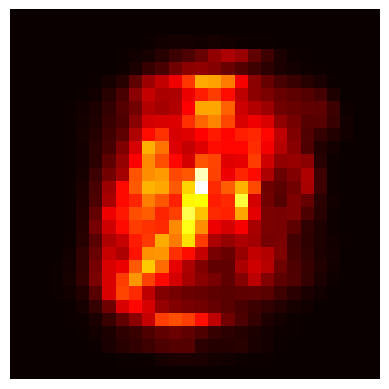

In [104]:
plot_digit(rf_clf.feature_importances_)
plt.savefig('./../img/Importance_RandomForest.png', dpi=300, bbox_inches='tight')

In [106]:
generate_file(rf_clf, 'result3')

![](./../img/result3.png)

效果与支持向量机相差不大

**最关键的是与验证集预测几乎无差**

### 4、lGBM（LightGBM）

In [12]:
from lightgbm import LGBMClassifier, early_stopping, log_evaluation

In [129]:
# TODO 树模型对特征尺度不敏感，不需要 StandardScaler
# TODO LightGBM 本身具备高效处理高维数据的能力，不需要 PCA
lgbm_clf = LGBMClassifier(n_estimators=1000, max_depth=10, min_child_samples=20, n_jobs=-1)     # , verbosity=-1

callbacks = [early_stopping(stopping_rounds=50), log_evaluation(period=100)]
lgbm_clf.fit(X_train, y_train, eval_set=[(X_val, y_val)], eval_metric='multi_logloss', callbacks=callbacks)

print(f'best_iteration : {lgbm_clf.best_iteration_}')
print(f'best_score : {lgbm_clf.best_score_}')

Training until validation scores don't improve for 50 rounds
[100]	valid_0's multi_logloss: 0.0863439
Early stopping, best iteration is:
[145]	valid_0's multi_logloss: 0.0824551
best_iteration : 145
best_score : defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', np.float64(0.08245513655703991))])})


In [130]:
lgbm_clf.score(X_val, y_val)

0.9761904761904762

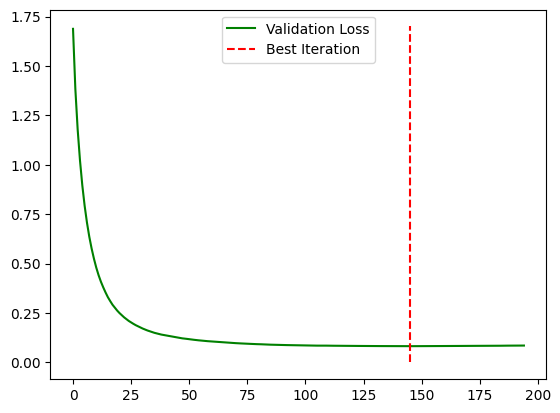

In [49]:
results = lgbm_clf.evals_result_
plt.plot(results['valid_0']['multi_logloss'], 'g-', label='Validation Loss')
plt.plot([145, 145], [0, 1.7], 'r--', label='Best Iteration')
plt.legend()

In [131]:
lgbm_clf.feature_importances_.shape

(784,)

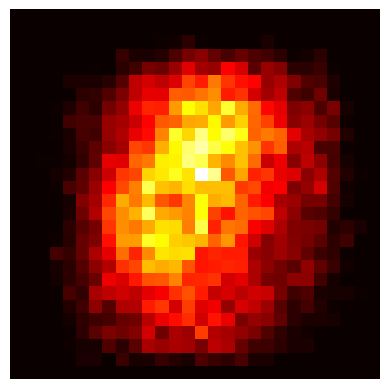

In [132]:
plot_digit(lgbm_clf.feature_importances_)
plt.savefig('./../img/Importance_LightGBM.png', dpi=300, bbox_inches='tight')

In [47]:
generate_file(lgbm_clf, 'result4')

![](./../img/result4.png)

**RandomForestClassifier 与 LGBMClassifier 特征重要性对比**

***(Bagging 与 Boosting 的对比)***

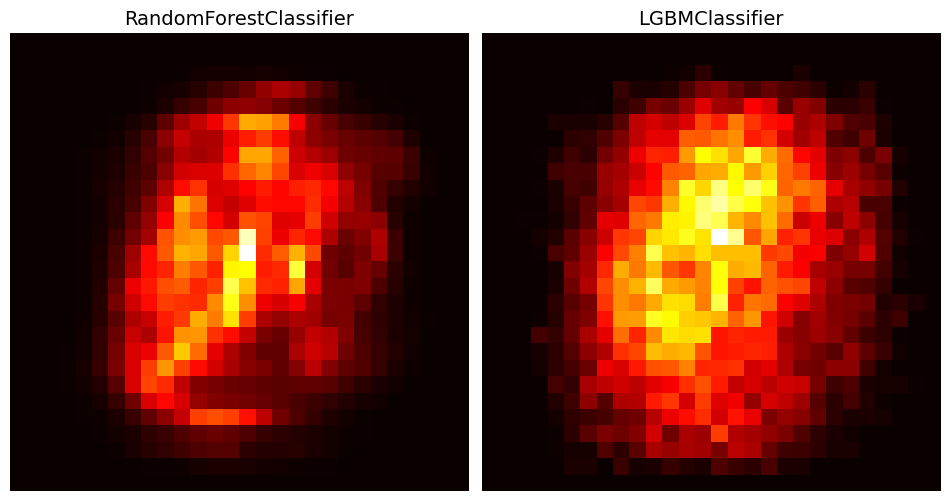

In [135]:
plt.figure(figsize=(12, 6))
plt.subplots_adjust(wspace=0.03)
plt.subplot(121)
plot_digit(rf_clf.feature_importances_)
plt.title('RandomForestClassifier', fontsize=14)
plt.subplot(122)
plot_digit(lgbm_clf.feature_importances_)
plt.title('LGBMClassifier', fontsize=14)
plt.savefig('./../img/Comparison_Chart.png', dpi=300, bbox_inches='tight')

***随机森林像把重要性平均分给多个特征，红色更淡且分散；LGBM像放大镜聚焦在关键特征上，红色更浓。***

---

通过 **随机森林（分散热力）** 与 **LGBM（聚焦热力）** 的对比：

直观展现了 **Bagging** 与 **Boosting** 集成方法的核心差异

>—— ***群体智慧优化稳定性 vs 迭代强化关键特征精准性***

这种差异为模型选择（稳定性优先或特征解释性优先）及特征工程优化方向提供了直接判据。

**直白地讲：**

两种机器学习模型（随机森林和LGBM）做决策时是有"关注点"的差异的。

>左边的 随机森林 像很多人投票，每个特征都有点用，***结果更稳定但不够精准***；

>右边的 LGBM 像学霸专攻重点，能快速抓住最关键的特征，***判断更精准但容易钻牛角尖***。

### 5. 投票 (Voting)

SVC | RandomForestClassifier | LGBMClassifier

In [13]:
from sklearn.ensemble import VotingClassifier

In [16]:
svc_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=695, random_state=42)),
    ('svc', SVC(C=10, probability=True, random_state=42)),
])
rf_clf = RandomForestClassifier(n_estimators=600, max_depth=27, min_samples_leaf=2, n_jobs=-1, random_state=42)
lgbm_clf = LGBMClassifier(n_estimators=145, max_depth=10, min_child_samples=20, n_jobs=-1, random_state=42, verbosity=-1)

estimators = [('SVC', svc_clf), ('RandomForest', rf_clf), ('LGBM', lgbm_clf), ]

In [23]:
vote_hard_clf = VotingClassifier(estimators=estimators, voting='hard', n_jobs=-1)
vote_hard_clf

VotingClassifier(estimators=[('SVC',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('pca',
                                               PCA(n_components=695,
                                                   random_state=42)),
                                              ('svc',
                                               SVC(C=10, probability=True,
                                                   random_state=42))])),
                             ('RandomForest',
                              RandomForestClassifier(max_depth=27,
                                                     min_samples_leaf=2,
                                                     n_estimators=600,
                                                     n_jobs=-1,
                                                     random_state=42)),
                             ('LGBM',
                              LGBMClassifier(max_depth=10, n_estimators=145,
                                             n_jobs=-1, random_state=42,
                                             verbosity=-1))],
                 n_jobs=-1)

In [24]:
vote_soft_clf = VotingClassifier(estimators=estimators, voting='soft', n_jobs=-1)
vote_soft_clf

VotingClassifier(estimators=[('SVC',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('pca',
                                               PCA(n_components=695,
                                                   random_state=42)),
                                              ('svc',
                                               SVC(C=10, probability=True,
                                                   random_state=42))])),
                             ('RandomForest',
                              RandomForestClassifier(max_depth=27,
                                                     min_samples_leaf=2,
                                                     n_estimators=600,
                                                     n_jobs=-1,
                                                     random_state=42)),
                             ('LGBM',
                              LGBMClassifier(max_depth=10, n_estimators=145,
                                             n_jobs=-1, random_state=42,
                                             verbosity=-1))],
                 n_jobs=-1, voting='soft')

In [25]:
for model in (svc_clf, rf_clf, lgbm_clf, vote_hard_clf, vote_soft_clf):
    model.fit(X_train, y_train)
    score = model.score(X_val, y_val)
    print(model.__class__.__name__, ':', score)

Pipeline : 0.9657142857142857
RandomForestClassifier : 0.964
LGBMClassifier : 0.9761904761904762
VotingClassifier : 0.9758095238095238
VotingClassifier : 0.9782857142857143


In [26]:
generate_file(vote_hard_clf, 'result5_hard')

![](./../img/result5_hard.png)

In [27]:
generate_file(vote_soft_clf, 'result5_soft')

![](./../img/result5_soft.png)

### 6. 堆叠

SVC | RandomForestClassifier | LGBMClassifier

In [14]:
from sklearn.ensemble import StackingClassifier

In [ ]:
stack_clf = StackingClassifier(estimators=estimators, cv=3, n_jobs=-1)
stack_clf.fit(X_train, y_train)

In [20]:
stack_clf

StackingClassifier(cv=3,
                   estimators=[('SVC',
                                Pipeline(steps=[('scaler', StandardScaler()),
                                                ('pca',
                                                 PCA(n_components=695,
                                                     random_state=42)),
                                                ('svc',
                                                 SVC(C=10, probability=True,
                                                     random_state=42))])),
                               ('RandomForest',
                                RandomForestClassifier(max_depth=27,
                                                       min_samples_leaf=2,
                                                       n_estimators=600,
                                                       n_jobs=-1,
                                                       random_state=42)),
                               ('LGBM',
                                LGBMClassifier(max_depth=10, n_estimators=145,
                                               n_jobs=-1, random_state=42,
                                               verbosity=-1))],
                   n_jobs=-1)

In [30]:
stack_clf.score(X_val, y_val)

0.9791428571428571

In [31]:
generate_file(stack_clf, 'result6')

![](./../img/result6.png)

尝试其他最终模型

In [17]:
stack_clf_svc = StackingClassifier(estimators=estimators, final_estimator=SVC(), cv=3, n_jobs=-1)
stack_clf_svc.fit(X_train, y_train)

StackingClassifier(cv=3,
                   estimators=[('SVC',
                                Pipeline(steps=[('scaler', StandardScaler()),
                                                ('pca',
                                                 PCA(n_components=695,
                                                     random_state=42)),
                                                ('svc',
                                                 SVC(C=10, probability=True,
                                                     random_state=42))])),
                               ('RandomForest',
                                RandomForestClassifier(max_depth=27,
                                                       min_samples_leaf=2,
                                                       n_estimators=600,
                                                       n_jobs=-1,
                                                       random_state=42)),
                               ('LGBM',
                                LGBMClassifier(max_depth=10, n_estimators=145,
                                               n_jobs=-1, random_state=42,
                                               verbosity=-1))],
                   final_estimator=SVC(), n_jobs=-1)

In [18]:
stack_clf_svc.score(X_val, y_val)

0.9792380952380952

In [23]:
generate_file(stack_clf_svc, 'result6_svc')

![](./../img/result6_svc.png)

In [21]:
stack_clf_random = StackingClassifier(estimators=estimators, final_estimator=RandomForestClassifier(n_jobs=-1), cv=3, n_jobs=-1)
stack_clf_random.fit(X_train, y_train)

StackingClassifier(cv=3,
                   estimators=[('SVC',
                                Pipeline(steps=[('scaler', StandardScaler()),
                                                ('pca',
                                                 PCA(n_components=695,
                                                     random_state=42)),
                                                ('svc',
                                                 SVC(C=10, probability=True,
                                                     random_state=42))])),
                               ('RandomForest',
                                RandomForestClassifier(max_depth=27,
                                                       min_samples_leaf=2,
                                                       n_estimators=600,
                                                       n_jobs=-1,
                                                       random_state=42)),
                               ('LGBM',
                                LGBMClassifier(max_depth=10, n_estimators=145,
                                               n_jobs=-1, random_state=42,
                                               verbosity=-1))],
                   final_estimator=RandomForestClassifier(n_jobs=-1),
                   n_jobs=-1)

In [22]:
stack_clf_random.score(X_val, y_val)

0.9797142857142858

In [24]:
generate_file(stack_clf_random, 'result6_random')

![](./../img/result6_random.png)

In [25]:
stack_clf_light = StackingClassifier(estimators=estimators, final_estimator=LGBMClassifier(n_jobs=-1), cv=3, n_jobs=-1)
stack_clf_light.fit(X_train, y_train)

StackingClassifier(cv=3,
                   estimators=[('SVC',
                                Pipeline(steps=[('scaler', StandardScaler()),
                                                ('pca',
                                                 PCA(n_components=695,
                                                     random_state=42)),
                                                ('svc',
                                                 SVC(C=10, probability=True,
                                                     random_state=42))])),
                               ('RandomForest',
                                RandomForestClassifier(max_depth=27,
                                                       min_samples_leaf=2,
                                                       n_estimators=600,
                                                       n_jobs=-1,
                                                       random_state=42)),
                               ('LGBM',
                                LGBMClassifier(max_depth=10, n_estimators=145,
                                               n_jobs=-1, random_state=42,
                                               verbosity=-1))],
                   final_estimator=LGBMClassifier(n_jobs=-1), n_jobs=-1)

In [26]:
stack_clf_light.score(X_val, y_val)

D:\dev\python\python3.11.0\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


0.9795238095238096

In [27]:
generate_file(stack_clf_light, 'result6_light')

D:\dev\python\python3.11.0\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


![](./../img/result6_light.png)

## 三、学习总结

### 模型对比

- 图像处理的利器是神经网络，而这些机器学习算法虽然也可以进行图像的多分类任务，但相较于神经网络有一定的差距。
- MNIST 数据集的图像数量为 (42000, 28, 28) 属于大数据量，传统机器学习算法所需运行时间长。这也使得项目推进缓慢且效果一般，因此边际效益高。

---

|    名称    |           函数           |    最高得分     |      对比      |
|:--------:|:----------------------:|:-----------:|:------------:|
|   逻辑回归   |   LogisticRegression   |   0.91985   |  数据需要标准化和降维  |
|  支持向量机   |          SVC           |   0.96432   |  数据需要标准化和降维  |
|   随机森林   | RandomForestClassifier |   0.96396   |  树模型，对数值不敏感  |
| LightGBM |     LGBMClassifier     |   0.97392   |  树模型，对数值不敏感  |
|    投票    |    VotingClassifier    |   0.97660   | 取长补短，但边际效益较高 |
|    堆叠    |   StackingClassifier   | **0.97903** | 取长补短，但边际效益较高 |

### 杂谈

虽然未学习深度学习的相关知识，但在 ***兴趣使然下***，我还是运用目前所掌握的知识尝试了该项目。

---

在本次学习的过程中，最有趣的地方莫过于 Kaggle 排名 ***蜗牛一般的缓慢攀爬速度了 :)*** 。

作为一个刚刚爬完 Titanic 的 ***纯机器学习新手*** ，这实在让人无可奈何的笑了！

只能说 ***Titanic 确实得沉*** ，它水是真多啊：
- 如果您也做过这个项目，您可能也觉得它 ***该沉*** 。
- 如果您未做过这个项目，那么它可以给你一种 ***降维打击的快乐*** 。

---

回到本项目，除了排名的有趣，也存在着一些 ***挑战*** ：
- 首当其冲的就是 ***数据集 MNIST 的庞大*** （我至今做过的最大数据量）
- 然后就是庞大数据集带来 ***运行时间的指数级增长*** （我就一 Inter Core i5-12500H 笔记本，能当电风扇了）
- 因此我放弃了（随机）网格搜索，只能挑战 ***手动搜索加运气***  {{{(>_<)}}}，因此我所得出的最优可能不是真正的最优（可能真正最优能够到达 0.98 以上）

---

收获：
- 了解了使用 ***PCA 配合 StandardScaler*** 进行数据降维
- 更加熟练地使用了 ***逻辑回归、支持向量机、随机森林、投票、堆叠***
- 基本学会了 ***LightGBM 的使用*** （AdaBoost 和 GradientBoost 并不好用）
- 对比了 ***随机森林 与 LightGBM 的特征重要性的不同*** （对比图是真漂亮！）

---

***完事收工！去学深度学习去了！<(￣︶￣)↗[GO!]***